In [ ]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()

In [ ]:
tf.executing_eagerly()

True

In [ ]:
import os
import glob
import numpy as np

# Plots and Images
import matplotlib.pyplot as plt
from IPython.display import Image
import SimpleITK as sitk

# Tensorflow and Keras
import tensorflow as tf
import keras
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import smart_resize
from tensorflow.image import rgb_to_grayscale
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import boto3
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D
#import pydicom
import SimpleITK as sitk
import tensorflow as tf
import pandas as pd
import tflearn
from tflearn.layers.conv import conv_3d, max_pool_3d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import numpy as np
import matplotlib.pyplot as plt

import copy
import time
import pandas as pd

from tqdm.notebook import tqdm
from collections import namedtuple

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
session = boto3.Session(
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key
)
s3 = session.resource('s3')
bucket = s3.Bucket('fastvision.ai')

In [ ]:
import os

def count_raw_files(folder_path):
    # Initialize a variable to keep track of the count
    count = 0

    # List all files in the folder
    files = os.listdir(folder_path)

    # Loop through each file and check if it has the .raw extension
    for file in files:
        if file.endswith(".raw"):
            count += 1

    return count

# Replace "path/to/your/folder" with the path to the folder containing the .raw files
folder_path = "/content/data2"

# Call the function to get the count of .raw files
raw_file_count = count_raw_files(folder_path)
print(f"Number of .raw files in the folder: {raw_file_count}")


Number of .raw files in the folder: 17


In [ ]:
import os

def count_mhd_files(folder_path):
    # Initialize a variable to keep track of the count
    count = 0

    # List all files in the folder
    files = os.listdir(folder_path)

    # Loop through each file and check if it has the .mhd extension
    for file in files:
        if file.endswith(".mhd"):
            count += 1

    return count

# Replace "path/to/your/folder" with the path to the folder containing the .mhd files
folder_path = "/content/data2"

# Call the function to get the count of .mhd files
mhd_file_count = count_mhd_files(folder_path)
print(f"Number of .mhd files in the folder: {mhd_file_count}")


Number of .mhd files in the folder: 17


(256, 256, 256)


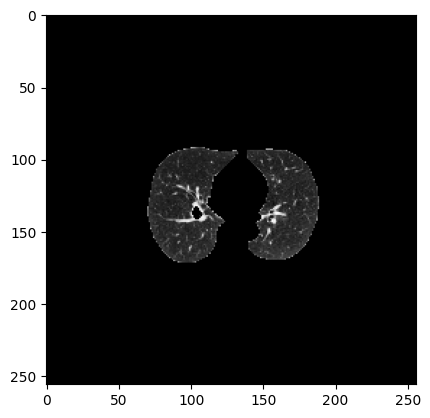

(256, 256, 256)


In [ ]:
mhd_file = sitk.ReadImage('data2/test/1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926682752765845212286.mhd')
ct_scan = np.array(sitk.GetArrayFromImage(mhd_file), dtype=np.float32)
print(ct_scan.shape)
# Find the minimum value in the array
# Displays an image slice
plt.imshow(ct_scan[128], cmap='gray')
plt.show()
print(ct_scan.shape)

In [ ]:
file_key = 'raw-data/luna16/candidates_V2/candidates_V2.csv'
obj = bucket.Object(file_key)
df_candidates = pd.read_csv(obj.get()['Body'])
df_candidates.head()

,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,68.420000,-74.480000,-288.700000,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-95.209361,-91.809406,-377.426350,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-24.766755,-120.379294,-273.361539,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-63.080000,-65.740000,-344.240000,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,52.946688,-92.688873,-241.067872,0


In [ ]:
file_key = 'raw-data/luna16/annotations.csv'
obj = bucket.Object(file_key)
df_annotations = pd.read_csv(obj.get()['Body'])
df_annotations.head()

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150


In [ ]:
df_annotations.shape


(1186, 5)

In [ ]:
df_candidates.shape

(754975, 5)

In [ ]:
df_candidates['class'].value_counts()

0    753418
1      1557
Name: class, dtype: int64

In [ ]:
df_annotations['seriesuid'].nunique()

601

In [ ]:
df_annotations[df_annotations['diameter_mm'] >= 3]

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150
...,...,...,...,...,...
1181,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-160.856298,-28.560349,-269.168728,5.053694
1182,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-102.189570,-73.865766,-220.536241,4.556101
1183,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-37.535409,64.041949,-127.687101,4.357368
1184,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,43.196112,74.438486,-200.523314,4.277203


In [ ]:

unique_df_annotations = df_annotations.drop_duplicates(subset = 'seriesuid')
unique_df_annotations = unique_df_annotations[['seriesuid','diameter_mm']]
print(unique_df_annotations['seriesuid'].nunique())
unique_df_annotations

601


,seriesuid,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,5.651471
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,8.143262
7,1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028...,10.362321
8,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,21.089619
...,...,...
1177,1.3.6.1.4.1.14519.5.2.1.6279.6001.970428941353...,18.675526
1179,1.3.6.1.4.1.14519.5.2.1.6279.6001.975426625618...,8.117918
1180,1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707...,7.310400
1181,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,5.053694


In [ ]:
df_candidates['seriesuid'].nunique()

888

In [ ]:
cancer_df = df_candidates[df_candidates['class'] == 1]
cancer_df  = cancer_df.drop_duplicates(subset = 'seriesuid')
print(cancer_df['seriesuid'].nunique())
cancer_df

600


,seriesuid,coordX,coordY,coordZ,class
436,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,104.083933,-211.755826,-227.017987,1
2053,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.974375,-141.066875,876.777280,1
3633,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,1.790000,166.340000,-408.880000,1
6106,1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028...,81.706024,54.602293,-150.737316,1
7539,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,104.603466,20.582783,-92.516131,1
...,...,...,...,...,...
747774,1.3.6.1.4.1.14519.5.2.1.6279.6001.970428941353...,-121.510000,66.050000,-134.690000,1
750736,1.3.6.1.4.1.14519.5.2.1.6279.6001.975426625618...,52.555637,83.996934,-106.561601,1
751644,1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707...,-102.850463,57.852958,-124.742760,1
753549,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-102.640000,-73.820000,-220.660000,1


In [ ]:
unique_df_candidates = df_candidates.drop_duplicates(subset = 'seriesuid')
unique_df_candidates = unique_df_candidates[['seriesuid','class']]
unique_df_candidates

,seriesuid,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,0
1068,1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840...,0
1564,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,0
2699,1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926...,0
3171,1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482...,0
...,...,...
750894,1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707...,0
751918,1.3.6.1.4.1.14519.5.2.1.6279.6001.980362852713...,0
752275,1.3.6.1.4.1.14519.5.2.1.6279.6001.986011151772...,0
753384,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,0


In [ ]:
unique_df_candidates['class'].value_counts()

0    888
Name: class, dtype: int64

In [ ]:
unique_df_candidates['status'] = unique_df_candidates['seriesuid'].isin(cancer_df['seriesuid']).astype(int)
unique_df_candidates

,seriesuid,class,status
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,0,1
1068,1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840...,0,0
1564,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,0,1
2699,1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926...,0,0
3171,1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482...,0,0
...,...,...,...
750894,1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707...,0,1
751918,1.3.6.1.4.1.14519.5.2.1.6279.6001.980362852713...,0,0
752275,1.3.6.1.4.1.14519.5.2.1.6279.6001.986011151772...,0,0
753384,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,0,1


In [ ]:
final_unqiue = unique_df_candidates[['seriesuid','status']]
print(final_unqiue['status'].value_counts())
print(final_unqiue.head())

1    600
0    288
Name: status, dtype: int64
                                              seriesuid  status
0     1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...       1
1068  1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840...       0
1564  1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...       1
2699  1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926...       0
3171  1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482...       0


In [ ]:
#final_unqiue.to_csv('names.csv', index=False)

In [ ]:
import glob

folder_path = 'data2'  # Replace with the actual folder path

# Count the number of .mhd files in the folder
mhd_files = glob.glob(folder_path + '/*.mhd')
num_mhd_files = len(mhd_files)

# Print the count
print(f"Number of .mhd files: {num_mhd_files}")

Number of .mhd files: 17


In [ ]:
import glob

folder_path = 'data2/test'  # Replace with the actual folder path

# Count the number of .mhd files in the folder
mhd_files = glob.glob(folder_path + '/*.mhd')
num_mhd_files = len(mhd_files)

# Print the count
print(f"Number of .mhd files: {num_mhd_files}")

Number of .mhd files: 44


In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

positive_nodules = df_annotations
test_path = 'data2/test'
test_file_list = glob.glob(test_path + '/*.mhd')
train_path = 'data2'
train_file_list = glob.glob(train_path + '/*.mhd')


In [ ]:
def read_mhd_file(filepath):
    """Read and load volume"""
    # Read file
    dir_check = os.path.dirname(filepath)
    base = os.path.basename(filepath)
    if os.path.samefile(dir_check, test_path):
        if os.path.splitext(base)[0] in positive_nodules.values:
            y_test.append(1)
        else:
            y_test.append(0)
    else:

        if os.path.splitext(base)[0] in positive_nodules.values:
            y_train.append(1)
        else:
            y_train.append(0)

    scan = sitk.ReadImage(filepath)
    scan = sitk.GetArrayFromImage(scan)
    scan = np.moveaxis(scan, 0, 2)
    return scan

In [ ]:
def normalize(volume):
    min = -1000
    max = 400
    volume[volume < min] = min
    volume[volume > max] = max
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume

In [ ]:
from scipy import ndimage

def resize_volume(img):
    desired_depth = 64
    desired_width = 128
    desired_height = 128

    current_depth = img.shape[2]
    current_width = img.shape[0]
    current_height = img.shape[1]

    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height

    img = np.flip(img , axis=2)

    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img

In [ ]:
def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = read_mhd_file(path)
    volume = normalize(volume)
    volume = resize_volume(volume)
    return volume

In [ ]:
for file_path in test_file_list:
    #print(file_path)
    x_test.append(process_scan(file_path))
    #print("x_val; = ", len(x_test))

In [ ]:
len(x_test)

44

In [ ]:
len(y_test)

44

In [ ]:
for file_path in train_file_list:
    #print (file_path)
    x_train.append(process_scan(file_path))
    #print("x_train = ", len(x_train))

In [ ]:
len(x_train)

17

In [ ]:
len(y_train)

17

In [ ]:
def train_preprocessing(volume, label):
    """Process training data by rotating and adding a channel."""
    # Rotate volume
    volume = tf.expand_dims(volume, axis=3)
    return volume, label

In [ ]:
def validation_preprocessing(volume, label):
    """Process validation data by only adding a channel."""
    volume = tf.expand_dims(volume, axis=3)
    return volume, label

In [ ]:
x_train = np.array(x_train)
print("x_train = ", x_train.shape)
y_train = np.array(y_train)
print("y_train = ", y_train.shape)
x_test = np.array(x_test)
print("x_val = ", x_test.shape)
y_test = np.array(y_test)
print("y_val = ", y_test.shape)

# Define data loaders.
train_loader = tf.data.Dataset.from_tensor_slices((x_train, y_train))
validation_loader = tf.data.Dataset.from_tensor_slices((x_test, y_test))

x_train =  (17, 128, 128, 64)
y_train =  (17,)
x_val =  (44, 128, 128, 64)
y_val =  (44,)


In [ ]:
channels = 1
xtrainn = np.expand_dims(x_train, axis=-1)  # -1 means adding a new dimension at the end
xtestt = np.expand_dims(x_test, axis=-1)  # -1 means adding a new dimension at the end

print("Original image shape:", x_train.shape)
print("Original image shape:", x_test.shape)
print("Image shape with channel:", xtrainn.shape)
print("Image shape with channel:", xtestt.shape)

Original image shape: (17, 128, 128, 64)
Original image shape: (44, 128, 128, 64)
Image shape with channel: (17, 128, 128, 64, 1)
Image shape with channel: (44, 128, 128, 64, 1)


In [ ]:
# CNN Architecture

model = keras.Sequential()

# add first convolution layer to the model
model.add(keras.layers.Conv3D(
    filters=32,
    kernel_size=(3, 3,3),
    strides=(1, 1,1),
    padding='same',
    data_format='channels_last',
    name='conv_1',
    activation='relu'))



# add a max pooling layer with pool size (2,2) and strides of 2
# (this will reduce the spatial dimensions by half)
model.add(keras.layers.MaxPool3D(
    pool_size=(2,2,2),
    name='pool_1'))


# add second convolutional layer
model.add(keras.layers.Conv3D(
    filters=64,
    kernel_size=(3, 3,3),
    strides=(1, 1,1),
    padding='same',
    name='conv_2',
    activation='relu'))


# add second max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(keras.layers.MaxPool3D(
    pool_size=(2, 2,2), name='pool_2')
)


# add third convolutional layer
model.add(keras.layers.Conv3D(
    filters=128,
    kernel_size=(3, 3,3),
    strides=(1, 1,1),
    padding='same',
    name='conv_3',
    activation='relu'))



# add third max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(keras.layers.MaxPool3D(
    pool_size=(2, 2,2), name='pool_3')
)

# add fourth convolutional layer
model.add(keras.layers.Conv3D(
    filters=256,
    kernel_size=(3, 3,3),
    strides=(1, 1,1),
    padding='same',
    name='conv_4',
    activation='relu'))


# add fourth max pooling layer with pool size (2,2) and strides of 2
# (this will further reduce the spatial dimensions by half)
model.add(keras.layers.MaxPool3D(
    pool_size=(2, 2,2), name='pool_4')
)


# add a fully connected layer (need to flatten the output of the previous layers first)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(
    units=256,
    name='fc_1',
    activation='relu'))

# add dropout layer
model.add(keras.layers.Dropout(
    rate=0.2))

# add the last fully connected layer
# we set activation = "sigmoid" that returns class memembership probabilities which is binary in our case
model.add(keras.layers.Dense(
    units=1,
    name='fc_2',
    activation='sigmoid'))


# build model and print summary
tf.random.set_seed(1)
model.build(input_shape=(None, 128, 128, 64, 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv3D)             multiple                  896       
                                                                 
 pool_1 (MaxPooling3D)       multiple                  0         
                                                                 
 conv_2 (Conv3D)             multiple                  55360     
                                                                 
 pool_2 (MaxPooling3D)       multiple                  0         
                                                                 
 conv_3 (Conv3D)             multiple                  221312    
                                                                 
 pool_3 (MaxPooling3D)       multiple                  0         
                                                                 
 conv_4 (Conv3D)             multiple                 

In [ ]:
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy'])

In [ ]:
tf.random.set_seed(1234)
np.random.seed(1234)
#history = model.fit(xtrainn, y_train,validation_data=(xvall, y_val), epochs=5,)
history = model.fit(xtrainn, y_train, epochs=10, validation_split=0.3)

Train on 11 samples, validate on 6 samples
Epoch 1/10
11/11 [==============================] - 6s 561ms/sample - loss: 311.6793 - acc: 0.2727 - val_loss: 0.6547 - val_acc: 0.6667
Epoch 2/10
11/11 [==============================] - 1s 53ms/sample - loss: 0.5836 - acc: 0.7273 - val_loss: 0.6754 - val_acc: 0.6667
Epoch 3/10
11/11 [==============================] - 1s 54ms/sample - loss: 0.6029 - acc: 0.7273 - val_loss: 0.6977 - val_acc: 0.6667
Epoch 4/10
11/11 [==============================] - 1s 54ms/sample - loss: 0.5922 - acc: 0.7273 - val_loss: 0.7171 - val_acc: 0.6667
Epoch 5/10
11/11 [==============================] - 1s 54ms/sample - loss: 0.6649 - acc: 0.7273 - val_loss: 0.7310 - val_acc: 0.6667
Epoch 6/10
11/11 [==============================] - 1s 52ms/sample - loss: 0.6105 - acc: 0.7273 - val_loss: 0.7447 - val_acc: 0.6667
Epoch 7/10
11/11 [==============================] - 1s 51ms/sample - loss: 0.6514 - acc: 0.7273 - val_loss: 2379.9780 - val_acc: 0.3333
Epoch 8/10
11/11 [==

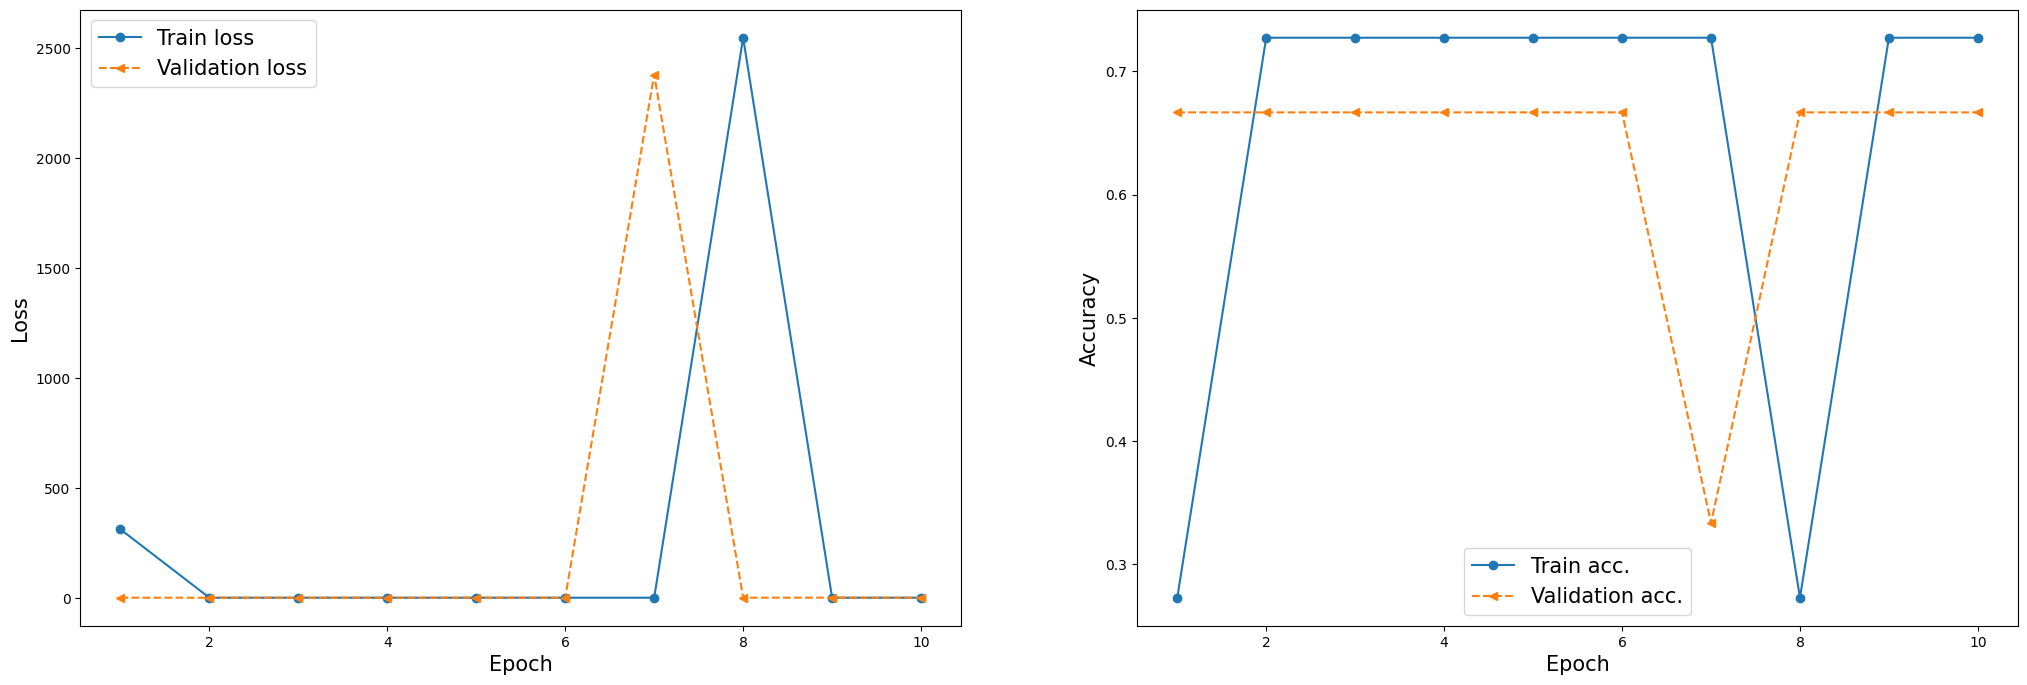

In [ ]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(25, 8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['acc'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_acc'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

In [ ]:
test_results = model.evaluate(xtestt, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))


Test Acc. 63.64%


## TORCH

In [ ]:
import os
import random
import shutil
import time
import warnings

import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim
from torch.utils.tensorboard import SummaryWriter

import torch.utils.data
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

In [ ]:
# import zipfile

# zip_file_path = "/content/data-2.zip"
# destination_directory = "/content/data"

# zip_ref = zipfile.ZipFile(zip_file_path, 'r')
# zip_ref.extractall(destination_directory)
# zip_ref.close()

In [ ]:
# import os
# import shutil

# def move_files(source_folder, destination_folder, num_files):
#     # Get a list of all files in the source folder
#     files = os.listdir(source_folder)

#     # Sort the files to ensure consistent order (e.g., alphabetical)
#     files.sort()

#     # Move the first 'num_files' files to the destination folder
#     for file in files[:num_files]:
#         source_path = os.path.join(source_folder, file)
#         destination_path = os.path.join(destination_folder, file)
#         shutil.move(source_path, destination_path)

# # Replace "path/to/source/folder" with the path to the source folder containing the files
# source_folder = "/content/data"

# # Replace "path/to/destination/folder" with the path to the destination folder
# destination_folder = "/content/data/val"

# # Specify the number of files you want to move
# num_files_to_move = 11

# # Call the function to move the files
# move_files(source_folder, destination_folder, num_files_to_move)

In [ ]:
SEED=1
random.seed(SEED)
torch.manual_seed(SEED)
cudnn.deterministic = True

In [ ]:
# set your active device to your GPU in this cell
device = 'cuda'

In [ ]:
if not torch.cuda.is_available():
    print('GPU not detected.. did you pass through your GPU?')

In [ ]:
if not torch.cuda.is_available():
    print('GPU not detected.. did you pass through your GPU?')

In [ ]:
torch.cuda.device_count()

1

In [ ]:
TRAINDIR="/data/train"
VALDIR = "/data/val"

# Need to create a Dataset and DataLoader class

In [ ]:
def train(train_loader, model, criterion, optimizer, epoch):
    batch_time = AverageMeter('Time', ':6.3f')
    data_time = AverageMeter('Data', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    top1 = AverageMeter('Acc@1', ':6.2f')
    top5 = AverageMeter('Acc@5', ':6.2f')
    progress = ProgressMeter(
        len(train_loader),
        [batch_time, data_time, losses, top1, top5],
        prefix="Epoch: [{}]".format(epoch))

    ######################
    # switch model to train mode here
    model.train()
    ################

    end = time.time()
    for i, (images, target) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)

        #####################
        images = images.to(device)
        target = target.to(device)
        # send the target to cuda device


        # compute output
        # output = model ?? images
        output = model(images)
        # compute loss
        # loss = criterion, output, target
        loss = criterion(output, target)

        # measure accuracy and record loss
        acc1, acc5 = accuracy(output, target, topk=(1, 5))
        losses.update(loss.item(), images.size(0))
        top1.update(acc1[0], images.size(0))
        top5.update(acc5[0], images.size(0))

        # compute gradient and do SGD step

        #### zero out gradients in the optimier
        ## optimizer ..??
        optimizer.zero_grad()
        ## backprop!
        ### loss... ???
        loss.backward()
        # update the weights!
        ## optimier .. ??
        optimizer.step()
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % PRINT_FREQ == 0:
            progress.display(i)

In [ ]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)

In [ ]:
class ProgressMeter(object):
    def __init__(self, num_batches, meters, prefix=""):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = prefix

    def display(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'

In [ ]:
import torch
import torch.nn as nn

class CNN3D(nn.Module):
    def __init__(self):
        super(CNN3D, self).__init__()

        self.conv1 = nn.Conv3d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv3d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv3d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv3d(128, 256, kernel_size=3, stride=1, padding=1)

        self.pool = nn.MaxPool3d(kernel_size=2, stride=2)

        self.dropout = nn.Dropout(p=0.2)

        self.fc = nn.Linear(256 * 8 * 8 * 8, 1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        x = self.relu(self.conv2(x))
        x = self.pool(x)

        x = self.relu(self.conv3(x))
        x = self.pool(x)

        x = self.relu(self.conv4(x))
        x = self.pool(x)

        x = x.view(-1, 256 * 8 * 8 * 8)
        x = self.dropout(x)
        x = self.fc(x)
        x = self.sigmoid(x)

        return x


In [ ]:
# Create an instance of the CNN model
model = CNN3D()

# Print the model summary
print(model)

# Use the GPU if it is available
model = model.to(device)

# Use the cross-entropy loss function
criterion = nn.CrossEntropyLoss()

# Use the AdamW optimizer
optimizer = optim.AdamW(model.parameters(), weight_decay=0.1)

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):

    epoch_start = time.time()

    train_loss, train_acc, train_pos, train_neg = train_loop(
        model, train_dl, criterion,
        optimizer, len(train_ds)
    )

    val_loss, val_acc, val_pos, val_neg = eval_loop(
        model, val_dl, criterion, len(val_ds)
    )

    time_elapsed = time.time() - epoch_start
    print(f'Epoch: {epoch+1:02} | Epoch Time: {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print()
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\tTrain - correct pos: {train_pos[0]}/{train_pos[1]} | correct neg: {train_neg[0]}/{train_neg[1]}')
    print()
    print(f'\tVal. Loss: {val_loss:.3f} |  Val. Acc: {val_acc*100:.2f}%')
    print(f'\tVal. - correct pos: {val_pos[0]}/{val_pos[1]} | correct neg: {val_neg[0]}/{val_neg[1]}')
    print()